<a href="https://colab.research.google.com/github/KornelWitkowski/Spectra/blob/main/Spektra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://github.com/KornelWitkowski/CzujnikGazow/raw/main/dane_pomiarowe/spektra_full_data.csv
!wget https://github.com/KornelWitkowski/CzujnikGazow/raw/main/dane_pomiarowe/full_data
!wget https://github.com/KornelWitkowski/CzujnikGazow/raw/main/dane_pomiarowe/train_data.csv
!wget https://github.com/KornelWitkowski/CzujnikGazow/raw/main/dane_pomiarowe/test_data.csv

--2022-04-03 18:41:18--  https://github.com/KornelWitkowski/CzujnikGazow/raw/main/dane_pomiarowe/spektra_full_data.csv
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/KornelWitkowski/CzujnikGazow/main/dane_pomiarowe/spektra_full_data.csv [following]
--2022-04-03 18:41:18--  https://raw.githubusercontent.com/KornelWitkowski/CzujnikGazow/main/dane_pomiarowe/spektra_full_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4124385 (3.9M) [text/plain]
Saving to: ‘spektra_full_data.csv’

spektra_full_data.c 100%[===================>]   3.93M  --.-KB/s    in 0.07s   

2022-04-03 18:41:18 (53.3 MB/

In [ ]:
import pandas as pd

# full_data = pd.read_csv("/content/spektra_full_data")
full_data = pd.read_csv("/content/full_data")
full_data.head()

,Uin,pressure,co2,ni,ox,ar,he,ne,356.519,356.766,...,835.533,835.737,835.94,836.143,836.346,836.549,836.752,836.955,837.158,837.361
0,1098.0,0.0050,0.0,0.00,0.00,0.00,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,663.0,0.0050,0.0,0.00,1.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,635.0,0.0050,0.0,0.78,0.21,0.01,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,962.0,0.0054,0.0,0.00,0.00,0.50,0.0,0.5,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,625.0,0.0100,0.0,0.78,0.21,0.01,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
full_data = pd.read_csv("/content/full_data")
full_data = full_data.sample(frac=1, random_state=42).reset_index().drop("index", axis=1)
full_data.head()

,Uin,pressure,co2,ni,ox,ar,he,ne,356.519,356.766,...,835.533,835.737,835.94,836.143,836.346,836.549,836.752,836.955,837.158,837.361
0,967.0,0.0100,0.090909,0.000000,0.00,0.454545,0.000000,0.454545,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,985.0,0.0030,0.000000,0.000000,0.00,0.500000,0.000000,0.500000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,960.0,0.0048,0.000000,0.780000,0.21,0.010000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,971.0,0.0120,0.000000,0.952381,0.00,0.000000,0.047619,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,782.0,0.0050,0.000000,0.000000,0.00,0.000000,1.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Models

In [ ]:
split = int((1-0.15)*len(full_data))

train_data = full_data.iloc[:split]
test_data = full_data.iloc[split:]

len(train_data), len(test_data)

(402, 72)

In [ ]:
# train_data = pd.read_csv("/content/train_data.csv")
#test_data = pd.read_csv("/content/test_data.csv")

In [ ]:
test_data.head()

,Uin,pressure,co2,ni,ox,ar,he,ne,356.519,356.766,...,835.533,835.737,835.94,836.143,836.346,836.549,836.752,836.955,837.158,837.361
402,971.0,0.0123,0.0,0.909091,0.00,0.00,0.090909,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
403,625.0,0.0100,0.0,0.780000,0.21,0.01,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
404,926.0,0.0050,0.0,1.000000,0.00,0.00,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
405,728.0,0.0050,0.0,1.000000,0.00,0.00,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
406,740.0,0.0015,0.0,0.780000,0.21,0.01,0.000000,0.0,0.0,15.490798,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
gases = ["co2", "ni","ox", "ar", "he", "ne"]

In [ ]:
U_train, p_train, concentration_train = train_data['Uin'], 10000*train_data["pressure"], train_data[gases]
params_train = pd.DataFrame({"U": U_train, "P": p_train})
spectra_train = train_data[train_data.columns[8:]]

U_test, p_test, concentration_test = test_data['Uin'], 10000*test_data["pressure"], test_data[gases]
params_test = pd.DataFrame({"U": U_test, "P": p_test})
spectra_test = test_data[test_data.columns[8:]]

In [ ]:
params_test.head()

,U,P
402,971.0,123.0
403,625.0,100.0
404,926.0,50.0
405,728.0,50.0
406,740.0,15.0


In [ ]:
spectra_train.head()

,356.519,356.766,357.012,357.259,357.506,357.753,357.999,358.246,358.493,358.74,...,835.533,835.737,835.94,836.143,836.346,836.549,836.752,836.955,837.158,837.361
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.617647,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
import numpy as np

wavelengths = spectra_train.columns
wavelengths = np.asarray(wavelengths.to_list()).astype(np.float32)

In [ ]:
wavelengths.min(), wavelengths.max()

(356.519, 837.361)

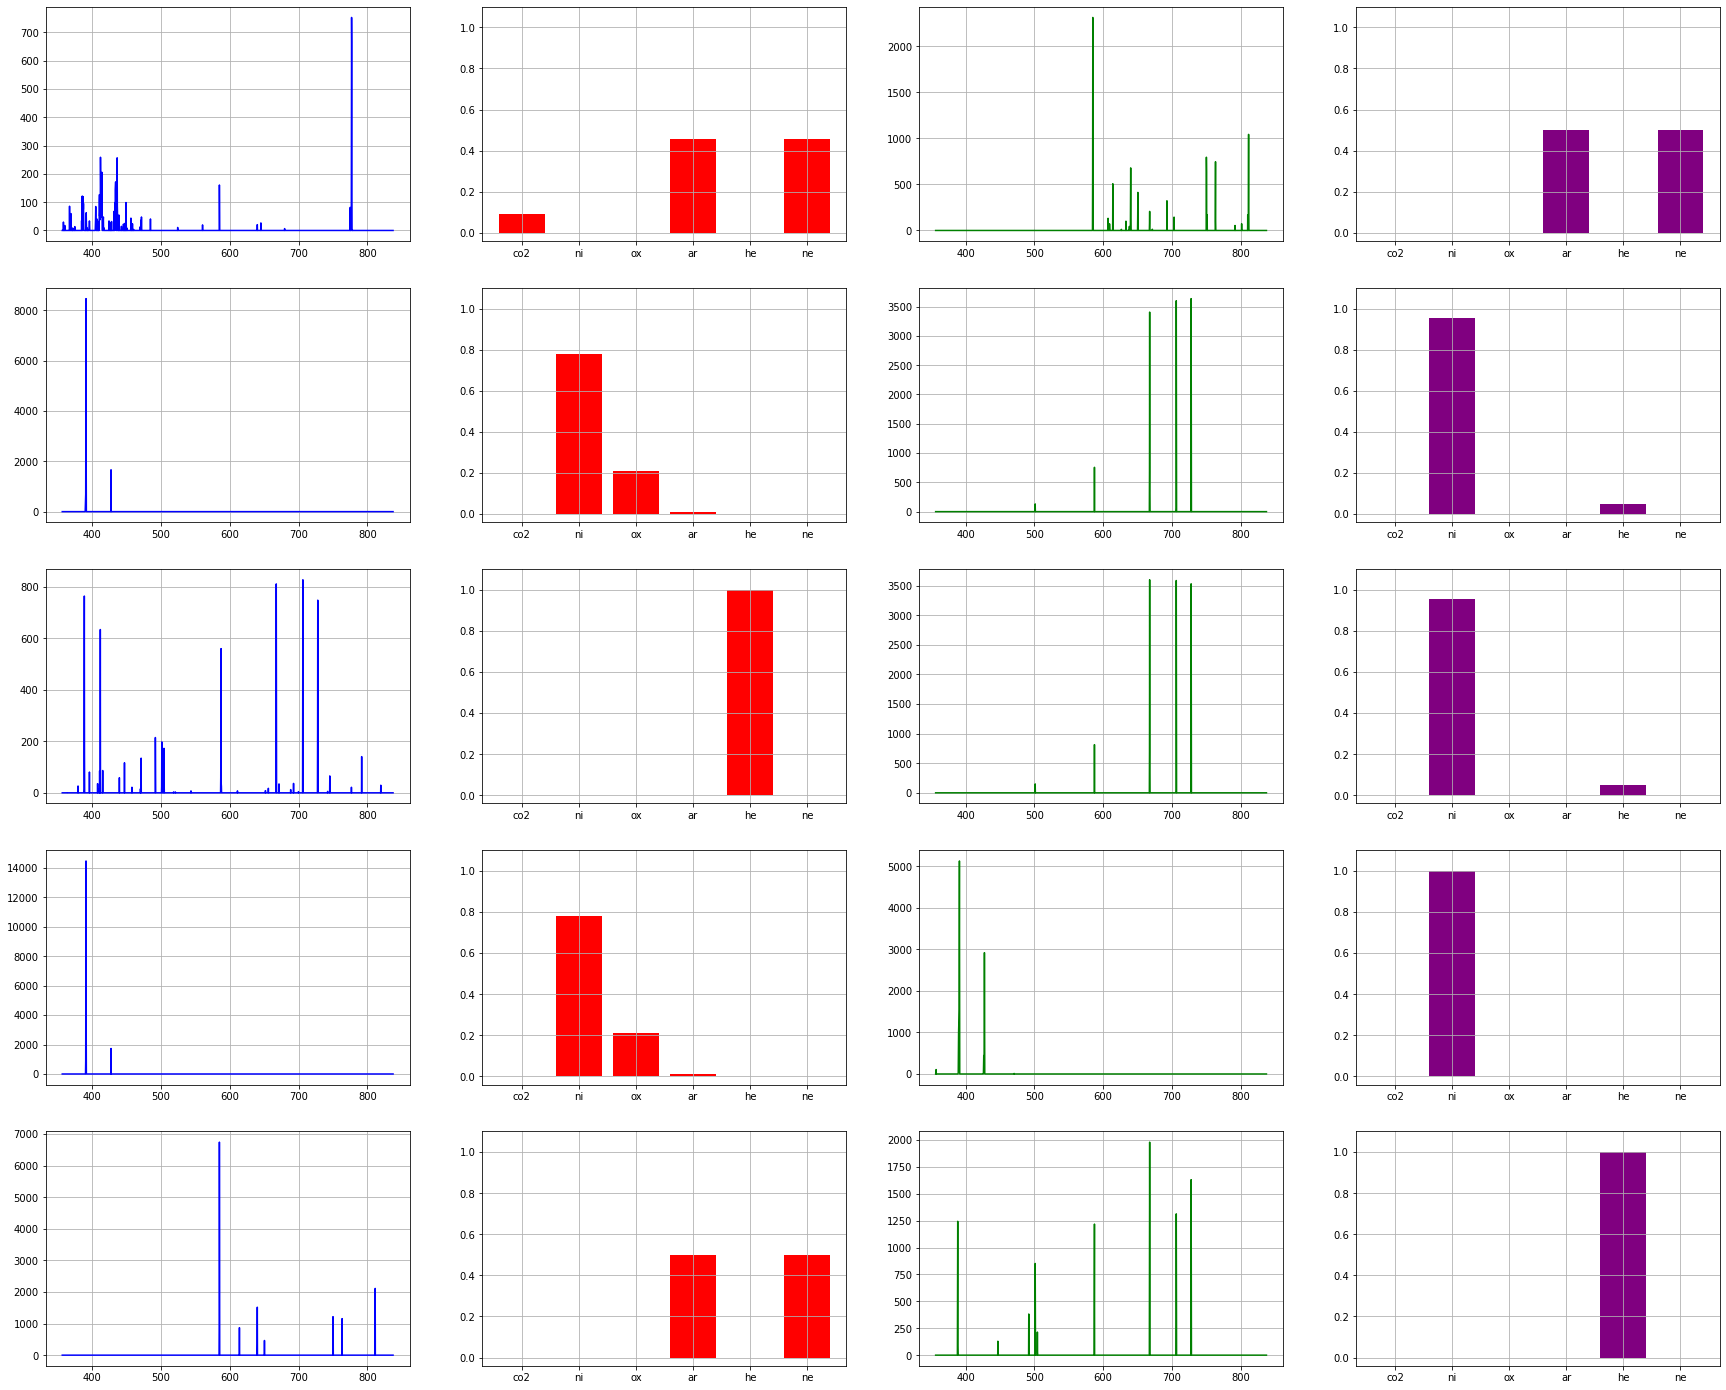

In [ ]:
import matplotlib.pyplot as plt

N = 5

fig, ax = plt.subplots(N, 4, figsize=(30,N*5))

spectras = spectra_train.to_numpy()
concentration = concentration_train.to_numpy()

for i in range(N):

  ax[i,0].plot(wavelengths, spectras[2*i,:], color="blue")
  ax[i,0].grid(True)
  ax[i,1].bar(gases, concentration[2*i,:], color="red")
  ax[i,1].grid(True)
  ax[i,1].set_ylim([-0.04,1.1])
  ax[i,2].plot(wavelengths, spectras[2*i+1,:], color="green")
  ax[i,2].grid(True)
  ax[i,3].bar(gases, concentration[2*i+1,:], color="purple")
  ax[i,3].grid(True)
  ax[i,3].set_ylim([-0.04,1.1])

In [ ]:
spectra_train.shape, concentration.shape

((402, 2048), (402, 6))

## Models with spectra only

In [ ]:
import tensorflow as tf

train_dataset_1 = tf.data.Dataset.from_tensor_slices((spectra_train, concentration_train))
test_dataset_1 = tf.data.Dataset.from_tensor_slices((spectra_test, concentration_test))

train_dataset_1 = train_dataset_1.batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset_1 = test_dataset_1.batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

results = {}

for i in range(100):
  tf.random.set_seed(i)

  inputs = Input(shape=(2048,))
  x = Dense(256, activation="tanh")(inputs)
  x = Dense(128, activation="tanh")(x)
  x = Dense(64, activation="tanh")(x)
  outputs = Dense(6, activation="softmax")(x)
  model_1 = Model(inputs, outputs, name="model_1")

  model_1.compile(loss="mae",
                  optimizer=Adam(),
                  metrics=["mae"])

  history_1 = model_1.fit(train_dataset_1,
              epochs=500,
              verbose=0,
              validation_data=test_dataset_1,
              callbacks=[EarlyStopping(monitor="val_loss", patience=50, restore_best_weights=True),
                          ReduceLROnPlateau(monitor="val_loss", patience=20)])

  result = model_1.evaluate(test_dataset_1, verbose=0)

  results[i]=round(result[0], 5)

  print(f"Random seed {i}, result: {round(result[0], 5)}")

Random seed 0, result: 0.01885
Random seed 1, result: 0.0209
Random seed 2, result: 0.01594
Random seed 3, result: 0.02063
Random seed 4, result: 0.01985
Random seed 5, result: 0.01716
Random seed 6, result: 0.02031
Random seed 7, result: 0.01889
Random seed 8, result: 0.02025
Random seed 9, result: 0.0201
Random seed 10, result: 0.01479
Random seed 11, result: 0.01991
Random seed 12, result: 0.02061
Random seed 13, result: 0.02194
Random seed 14, result: 0.02016
Random seed 15, result: 0.02085
Random seed 16, result: 0.01669
Random seed 17, result: 0.02059
Random seed 18, result: 0.01759
Random seed 19, result: 0.02059
Random seed 20, result: 0.02055
Random seed 21, result: 0.02076
Random seed 22, result: 0.0226
Random seed 23, result: 0.01654
Random seed 24, result: 0.01615
Random seed 25, result: 0.02041
Random seed 26, result: 0.0155
Random seed 27, result: 0.0197
Random seed 28, result: 0.02073
Random seed 29, result: 0.02106
Random seed 30, result: 0.02058
Random seed 31, result:

In [ ]:
model_1.evaluate(test_dataset_1)

3/3 [==============================] - 0s 5ms/step - loss: 0.0212 - mae: 0.0212


[0.021174881607294083, 0.021174881607294083]

In [ ]:
def plot_history(model_history):
  loss = model_history.history["loss"]
  val_loss = model_history.history["val_loss"]
  epochs = list(range(1, len(loss)+1))

  fig = plt.figure(figsize=(10,7))
  plt.plot(epochs, loss, label="loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title(f'History of model')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['train', 'test'], loc='upper right')
  plt.grid(True)
  plt.show()

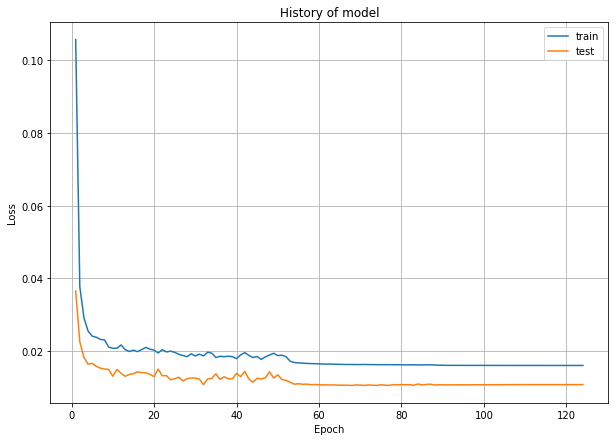

In [ ]:
plot_history(history_1)

In [ ]:
model_1_predictions = model_1.predict(test_dataset_1)

In [ ]:
mea_errors = tf.keras.metrics.MAE(model_1_predictions, concentration_test)

In [ ]:
errors_df = pd.DataFrame({"mea_errors": mea_errors}).sort_values("mea_errors", ascending=False)
errors_df.head()

,mea_errors
32,0.072354
66,0.070895
61,0.063408
36,0.062738
16,0.041169


In [ ]:
worst_predictions = errors_df.index.to_list()[:12]
worst_predictions

[32, 66, 61, 36, 16, 29, 11, 4, 31, 5, 42, 9]

In [ ]:
concentration_test

,co2,ni,ox,ar,he,ne
399,0.0,0.990099,0.00,0.000000,0.009901,0.0
400,0.0,0.000000,0.00,0.500000,0.000000,0.5
401,0.0,0.780000,0.21,0.010000,0.000000,0.0
402,0.0,0.975610,0.00,0.000000,0.024390,0.0
403,0.0,0.909091,0.00,0.090909,0.000000,0.0
...,...,...,...,...,...,...
465,0.0,0.780000,0.21,0.010000,0.000000,0.0
466,0.0,0.000000,0.00,0.000000,1.000000,0.0
467,0.0,0.000000,0.00,0.000000,1.000000,0.0
468,0.0,0.780000,0.21,0.010000,0.000000,0.0


In [ ]:
spectras[32,:].shape

(2048,)

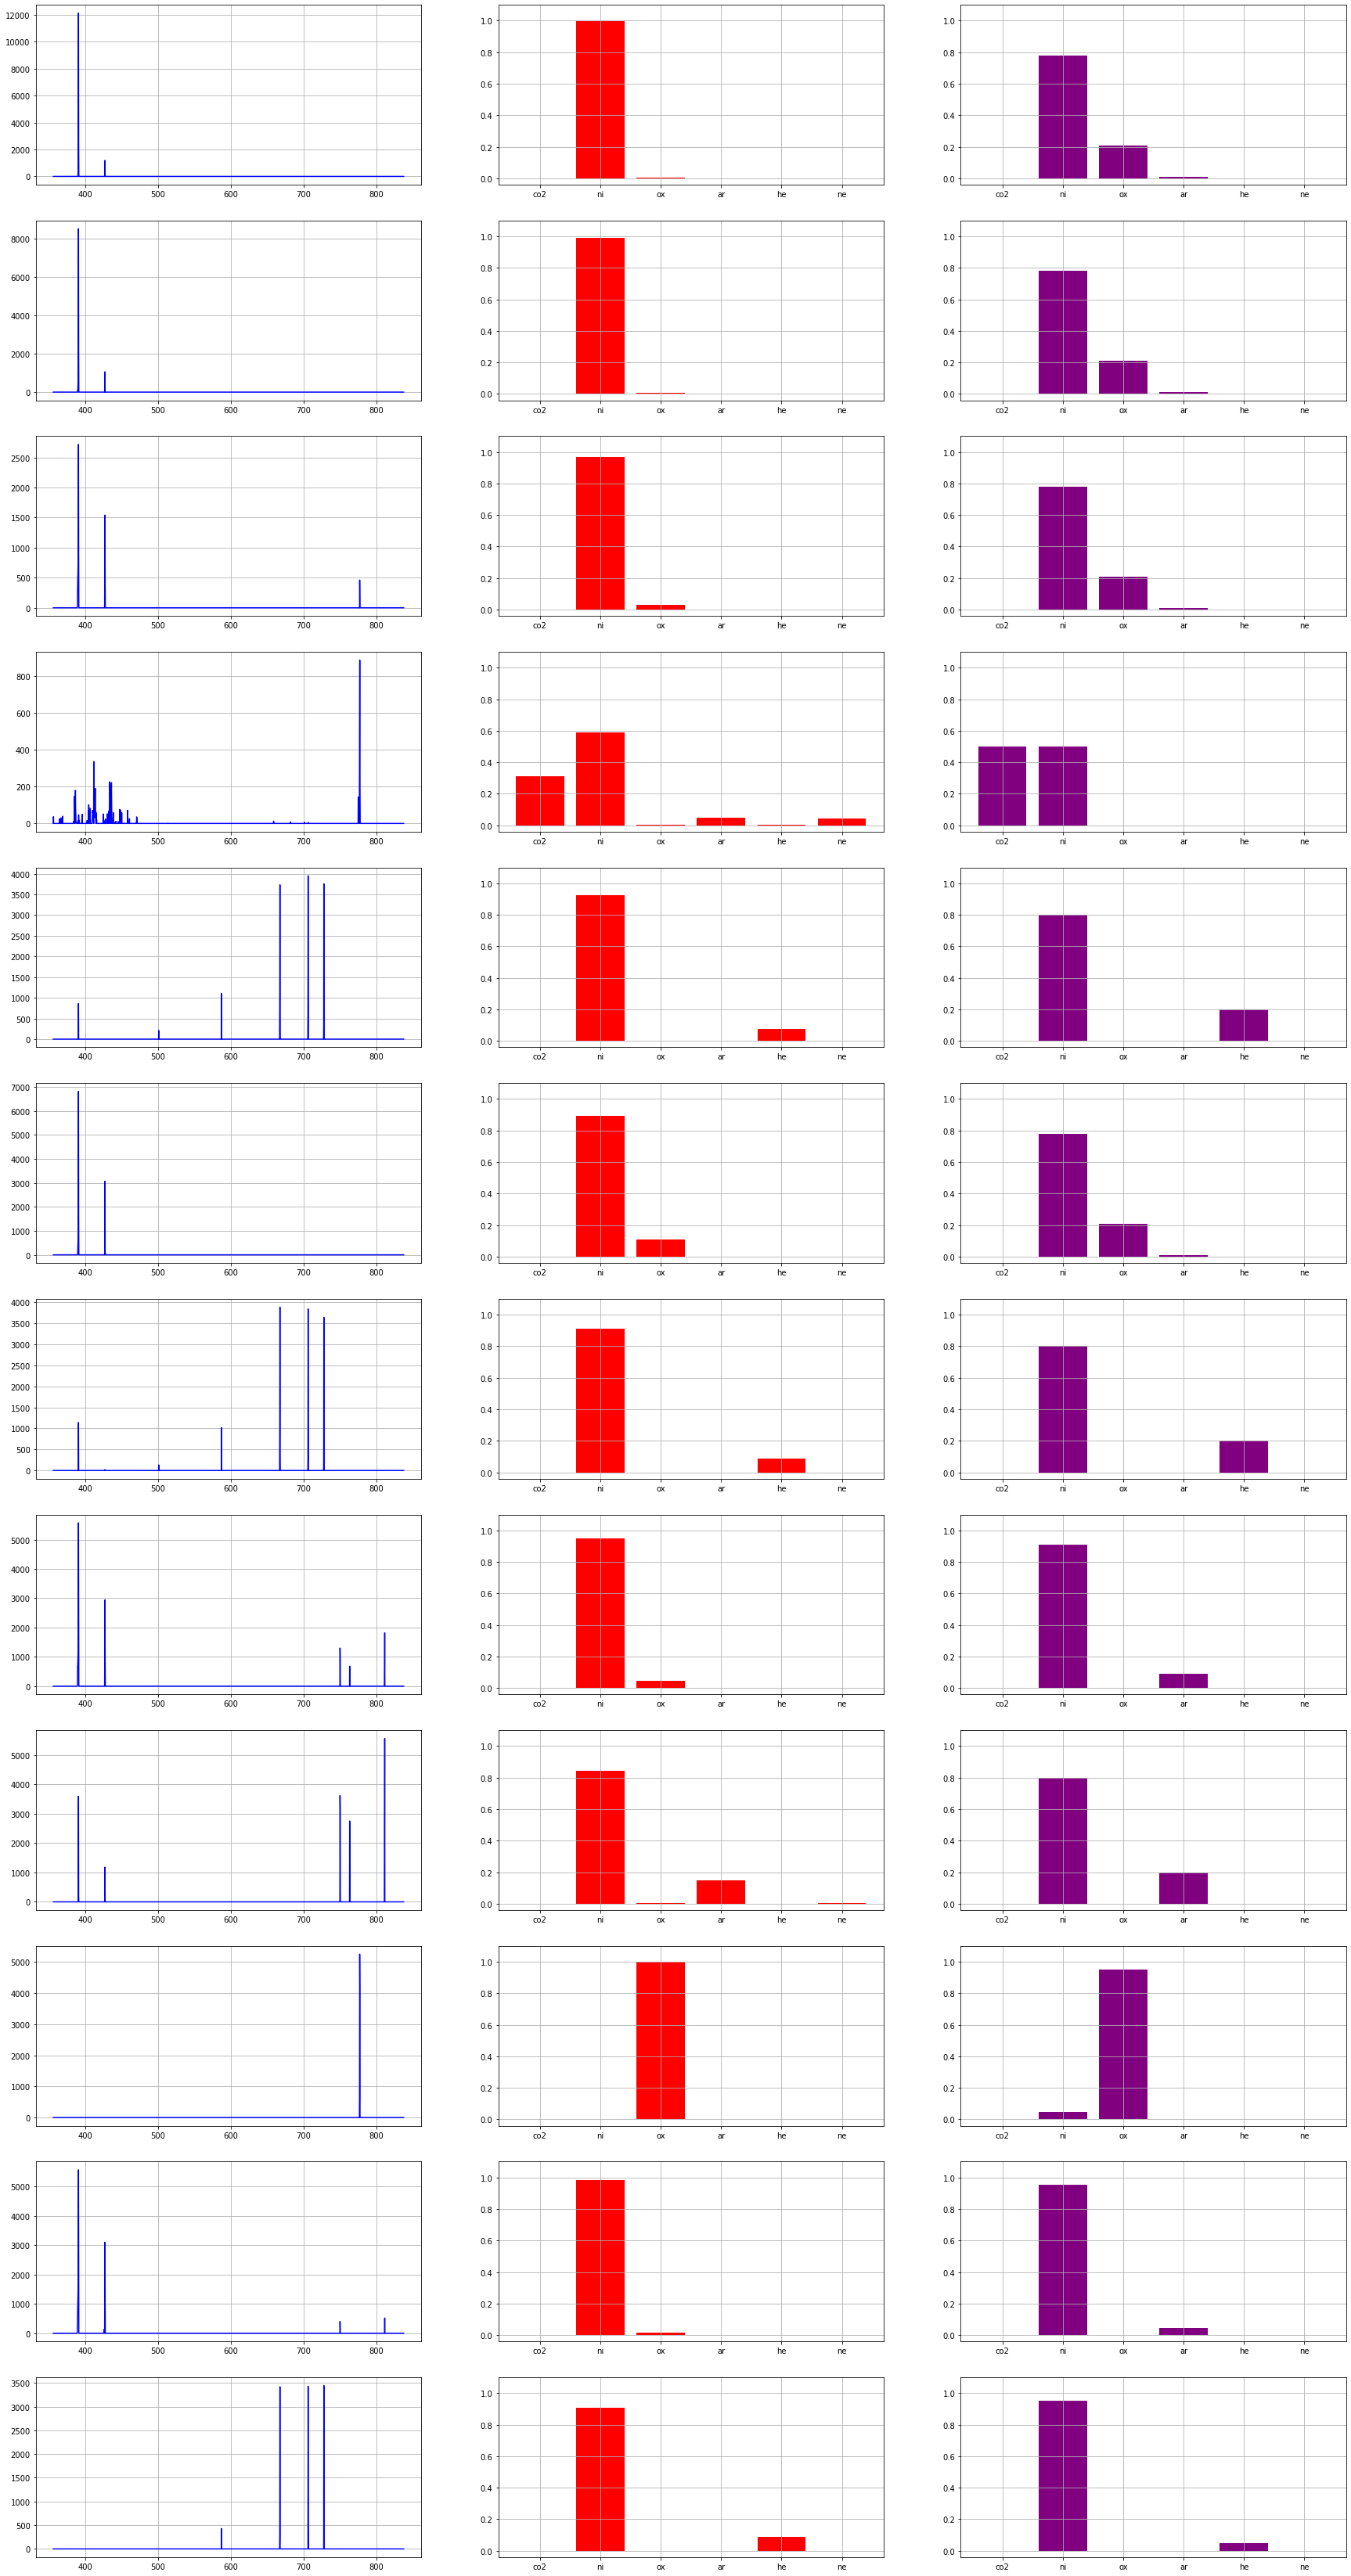

In [ ]:
import matplotlib.pyplot as plt

N = 12 # Number of worst predictions to show

fig, ax = plt.subplots(N, 3, figsize=(30,N*5))

spectras = spectra_test.to_numpy()
pred_concentration = model_1_predictions
true_concentration = concentration_test.to_numpy()

for i, j in enumerate(worst_predictions):

  ax[i,0].plot(wavelengths, spectras[j,:], color="blue")
  ax[i,0].grid(True)
  ax[i,1].bar(gases, pred_concentration[j,:], color="red")
  ax[i,1].grid(True)
  ax[i,1].set_ylim([-0.04,1.1])
  ax[i,2].bar(gases, true_concentration[j,:], color="purple")
  ax[i,2].grid(True)
  ax[i,2].set_ylim([-0.04,1.1])

In [ ]:
import matplotlib.pyplot as plt

N = 4

fig, ax = plt.subplots(N, 4, figsize=(30,N*5))

spectras = spectra_test.to_numpy()
concentration = concentration_test.to_numpy()

for i in range(N):

  ax[i,0].plot(wavelengths, spectras[2*i,:], color="blue")
  ax[i,0].grid(True)
  ax[i,1].bar(gases, concentration[2*i,:], color="red")
  ax[i,1].grid(True)
  ax[i,1].set_ylim([-0.04,1.1])
  ax[i,2].plot(wavelengths, spectras[2*i+1,:], color="green")
  ax[i,2].grid(True)
  ax[i,3].bar(gases, concentration[2*i+1,:], color="purple")
  ax[i,3].grid(True)
  ax[i,3].set_ylim([-0.04,1.1])

In [ ]:
import tensorflow as tf

from tensorflow.keras.layers import Input, Dense, Conv1D, MaxPool1D, Flatten, Lambda, MaxPooling1D
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

expand_dims_layer = Lambda(lambda x: tf.expand_dims(x, axis=1))

inputs = Input(shape=(2048,))
x = expand_dims_layer(inputs)
x = Conv1D(filters=256, kernel_size=7, strides=1, padding="same", activation="relu")(x)
x = MaxPooling1D(padding="same")(x)
x = Conv1D(filters=128, kernel_size=7, strides=1, padding="same", activation="relu")(x)
x = MaxPooling1D(padding="same")(x)
x = Conv1D(filters=32, kernel_size=3, strides=1, padding="same", activation="relu")(x)
x = MaxPooling1D(padding="same")(x)
x = Flatten()(x)
x = Dense(128, activation="tanh")(x)
x = Dense(64, activation="tanh")(x)
outputs = Dense(6, activation="softmax")(x)
model_2 = Model(inputs, outputs, name="model_2")

model_2.compile(loss="mae",
                optimizer=SGD(),
                metrics=["mae"])

history_2 = model_2.fit(train_dataset_1,
            epochs=100,
            verbose=1,
            validation_data=test_dataset_1,
            callbacks=[EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True),
                        ReduceLROnPlateau(monitor="val_loss", factor=0.33, patience=4)])

Epoch 1/100
12/12 [==============================] - 2s 97ms/step - loss: 0.1897 - mae: 0.1897 - val_loss: 0.1391 - val_mae: 0.1391 - lr: 0.0100
Epoch 2/100
12/12 [==============================] - 1s 81ms/step - loss: 0.1174 - mae: 0.1174 - val_loss: 0.0875 - val_mae: 0.0875 - lr: 0.0100
Epoch 3/100
12/12 [==============================] - 1s 85ms/step - loss: 0.0778 - mae: 0.0778 - val_loss: 0.0658 - val_mae: 0.0658 - lr: 0.0100
Epoch 4/100
12/12 [==============================] - 1s 82ms/step - loss: 0.0637 - mae: 0.0637 - val_loss: 0.0569 - val_mae: 0.0569 - lr: 0.0100
Epoch 5/100
12/12 [==============================] - 1s 85ms/step - loss: 0.0553 - mae: 0.0553 - val_loss: 0.0513 - val_mae: 0.0513 - lr: 0.0100
Epoch 6/100
12/12 [==============================] - 1s 83ms/step - loss: 0.0509 - mae: 0.0509 - val_loss: 0.0478 - val_mae: 0.0478 - lr: 0.0100
Epoch 7/100
12/12 [==============================] - 1s 85ms/step - loss: 0.0489 - mae: 0.0489 - val_loss: 0.0455 - val_mae: 0.045

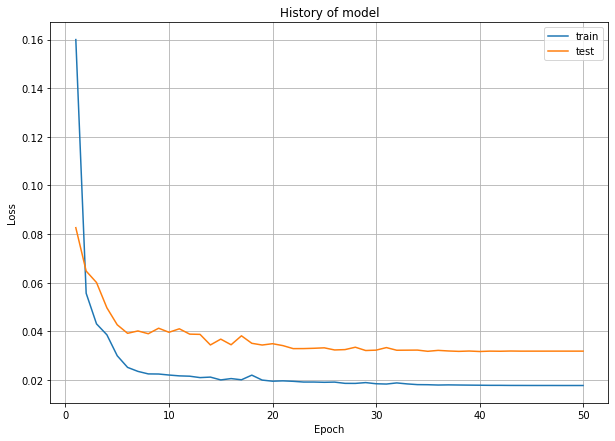

In [ ]:
plot_history(history_2)

## Model with spectra + pressure + U

In [ ]:
import tensorflow as tf

train_dataset_data = tf.data.Dataset.from_tensor_slices((params_train, spectra_train))
train_dataset_conc = tf.data.Dataset.from_tensor_slices(concentration_train)
train_dataset_2 = tf.data.Dataset.zip((train_dataset_data, train_dataset_conc))

test_dataset_data = tf.data.Dataset.from_tensor_slices((params_test, spectra_test))
test_dataset_conc = tf.data.Dataset.from_tensor_slices(concentration_test)
test_dataset_2 = tf.data.Dataset.zip((test_dataset_data, test_dataset_conc))


train_dataset_2 = train_dataset_2.batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset_2 = test_dataset_2.batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
from tensorflow.keras.layers import Input, Dense, Concatenate, Dropout
from tensorflow.keras import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

params_inputs = Input(shape=(2,))
x = Dense(16, activation="relu")(params_inputs)
params_outputs = Dense(8, activation="tanh")(x)
params_model = Model(params_inputs, params_outputs)

spektra_inputs = Input(shape=(2048,))
x = Dense(256, activation="relu")(spektra_inputs)
x = Dense(128, activation="tanh")(x)
spektra_outputs = Dense(64, activation="tanh")(x)
spektra_model = Model(spektra_inputs, spektra_outputs)

spektra_params_concat = Concatenate(name="spektra_params_concat")([params_model.output, spektra_model.output])

combined_dense = Dense(64, activation="tanh")(spektra_params_concat)
combined_dropout = Dropout(0.4)(combined_dense)
x = Dense(64, activation="tanh")(combined_dropout)
final_dropout = Dropout(0.1)(combined_dense)
output_layers = Dense(6, activation="softmax")(final_dropout)

model_3 = Model(inputs=[params_model.input, spektra_model.input],
                         outputs=output_layers)

model_3.compile(loss="mae",
                optimizer=Adam(),
                metrics=["mae"])


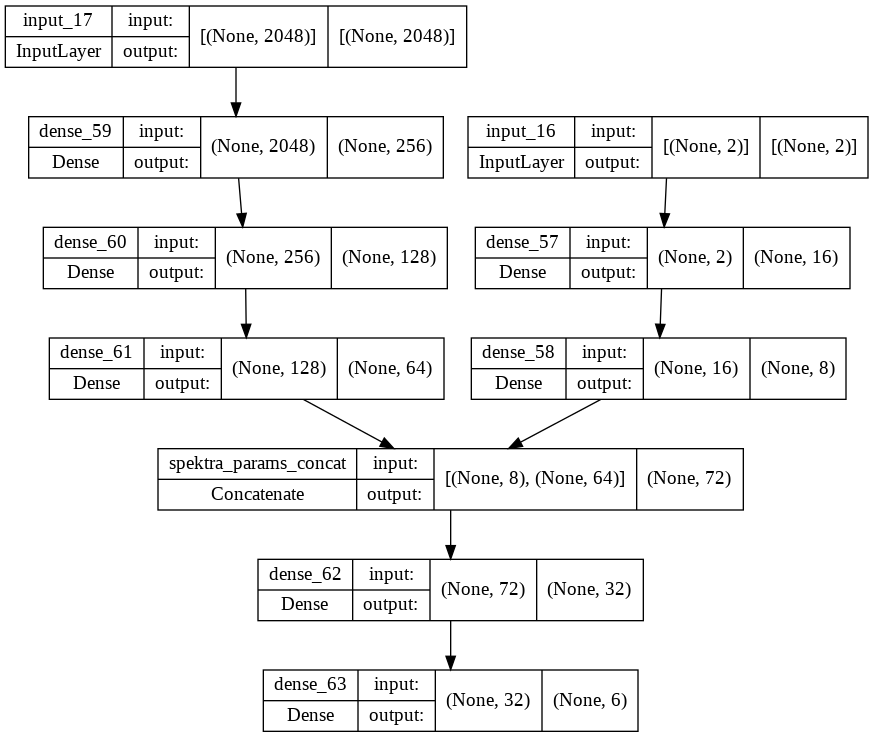

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model_3, show_shapes=True)

In [ ]:
history_3 = model_3.fit(train_dataset_2,
            epochs=1000,
            verbose=1,
            validation_data=test_dataset_2,
            callbacks=[EarlyStopping(monitor="val_loss", patience=50, restore_best_weights=True),
                        ReduceLROnPlateau(monitor="val_loss", patience=20)])

Epoch 1/1000
13/13 [==============================] - 1s 17ms/step - loss: 0.1265 - mae: 0.1265 - val_loss: 0.0656 - val_mae: 0.0656 - lr: 0.0010
Epoch 2/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.0448 - mae: 0.0448 - val_loss: 0.0440 - val_mae: 0.0440 - lr: 0.0010
Epoch 3/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.0337 - mae: 0.0337 - val_loss: 0.0401 - val_mae: 0.0401 - lr: 0.0010
Epoch 4/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.0323 - mae: 0.0323 - val_loss: 0.0379 - val_mae: 0.0379 - lr: 0.0010
Epoch 5/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.0296 - mae: 0.0296 - val_loss: 0.0410 - val_mae: 0.0410 - lr: 0.0010
Epoch 6/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.0325 - mae: 0.0325 - val_loss: 0.0363 - val_mae: 0.0363 - lr: 0.0010
Epoch 7/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.0284 - mae: 0.0284 - val_loss: 0.0320 - val_mae: 0.03

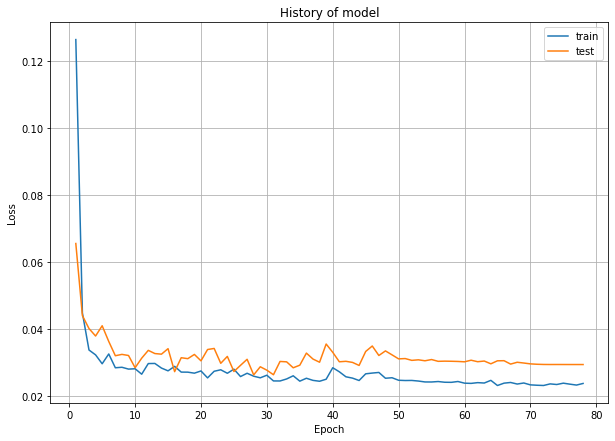

In [ ]:
plot_history(history_3)

In [ ]:
from tensorflow.keras.layers import Input, Dense, Concatenate, Dropout
from tensorflow.keras import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

spektra_cloned_model_1 = tf.keras.models.clone_model(model_1)

for layer in spektra_cloned_model_1.layers:
  layer.trainable = False

params_inputs = Input(shape=(2,))
params_outputs = Dense(8, activation="tanh")(params_inputs)
params_model = Model(params_inputs, params_outputs)

spektra_params_concat = Concatenate(name="spektra_params_concat")([params_model.output, spektra_cloned_model_1.output])

combined_dense = Dense(32, activation="tanh")(spektra_params_concat)
output_layers = Dense(6, activation="softmax")(combined_dense)

model_4 = Model(inputs=[params_model.input, spektra_cloned_model_1.input],
                         outputs=output_layers)

model_4.compile(loss="mae",
                optimizer=Adam(),
                metrics=["mae"])

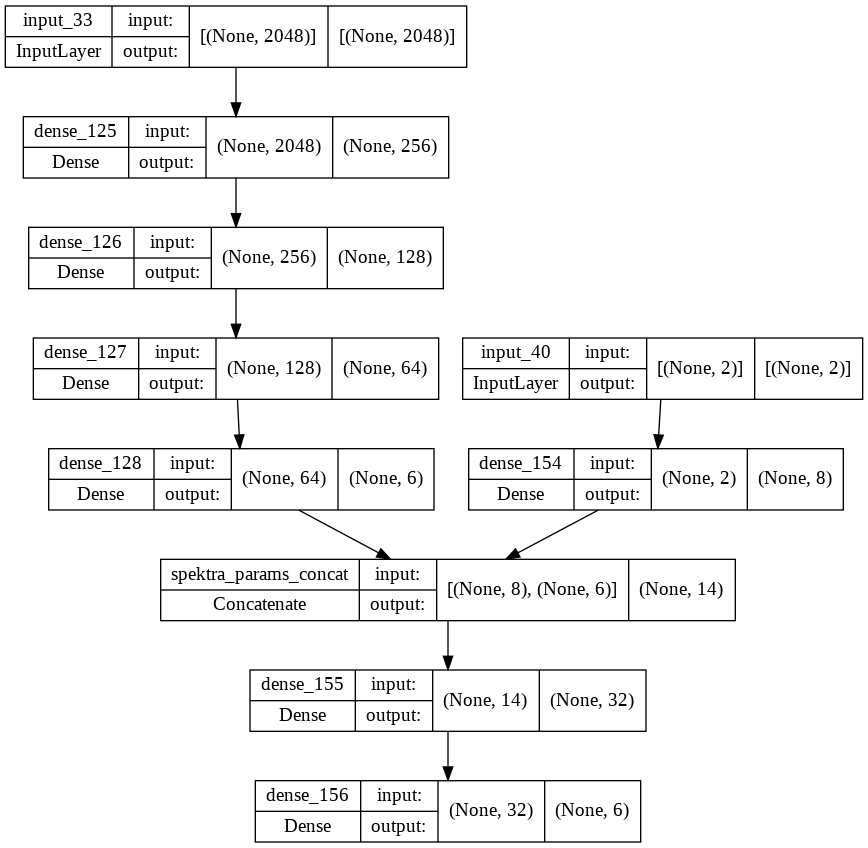

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model_4, show_shapes=True)

In [ ]:
history_4 = model_4.fit(train_dataset_2,
            epochs=1000,
            verbose=1,
            validation_data=test_dataset_2,
            callbacks=[EarlyStopping(monitor="val_loss", patience=80, restore_best_weights=True),
                        ReduceLROnPlateau(monitor="val_loss", patience=40)])

Epoch 1/1000
13/13 [==============================] - 2s 36ms/step - loss: 0.2614 - mae: 0.2614 - val_loss: 0.2452 - val_mae: 0.2452 - lr: 0.0010
Epoch 2/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.2310 - mae: 0.2310 - val_loss: 0.2084 - val_mae: 0.2084 - lr: 0.0010
Epoch 3/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.1808 - mae: 0.1808 - val_loss: 0.1701 - val_mae: 0.1701 - lr: 0.0010
Epoch 4/1000
13/13 [==============================] - 0s 14ms/step - loss: 0.1469 - mae: 0.1469 - val_loss: 0.1604 - val_mae: 0.1604 - lr: 0.0010
Epoch 5/1000
13/13 [==============================] - 0s 9ms/step - loss: 0.1386 - mae: 0.1386 - val_loss: 0.1585 - val_mae: 0.1585 - lr: 0.0010
Epoch 6/1000
13/13 [==============================] - 0s 11ms/step - loss: 0.1367 - mae: 0.1367 - val_loss: 0.1581 - val_mae: 0.1581 - lr: 0.0010
Epoch 7/1000
13/13 [==============================] - 0s 19ms/step - loss: 0.1360 - mae: 0.1360 - val_loss: 0.1580 - val_mae: 0

# Data presentation

## Spectra of mixture - evolution

### Argon

In [ ]:
full_data.head()

,Uin,pressure,co2,ni,ox,ar,he,ne,356.519,356.766,...,835.533,835.737,835.94,836.143,836.346,836.549,836.752,836.955,837.158,837.361
0,1098.0,0.0050,0.0,0.00,0.00,0.00,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,663.0,0.0050,0.0,0.00,1.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,635.0,0.0050,0.0,0.78,0.21,0.01,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,962.0,0.0054,0.0,0.00,0.00,0.50,0.0,0.5,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,625.0,0.0100,0.0,0.78,0.21,0.01,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
data_ar_ni = full_data[full_data['ni'] + full_data['ar'] == 1]
# data_ar_ni = data_ar_ni[data_ar_ni["ar"] == 0.01]
data_ar_ni = data_ar_ni[(900 < data_ar_ni["Uin"] ) & (data_ar_ni["Uin"] < 1000)]
data_ar_ni = data_ar_ni[(0.004 < data_ar_ni["pressure"]) & (data_ar_ni["pressure"] < 0.018)]
data_ar_ni.head()

,Uin,pressure,co2,ni,ox,ar,he,ne,356.519,356.766,...,835.533,835.737,835.94,836.143,836.346,836.549,836.752,836.955,837.158,837.361
5,960.0,0.015,0.0,0.800000,0.0,0.200000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15,980.0,0.005,0.0,1.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24,968.0,0.015,0.0,0.952381,0.0,0.047619,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27,968.0,0.015,0.0,0.975610,0.0,0.024390,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
43,977.0,0.012,0.0,1.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
data_ar_ni = full_data[full_data['ni'] + full_data['ar'] == 1]
# data_ar_ni = data_ar_ni[data_ar_ni["ar"] == 0.01]
data_ar_ni = data_ar_ni[(900 < data_ar_ni["Uin"] ) & (data_ar_ni["Uin"] < 1000)]
data_ar_ni = data_ar_ni[(0.004 < data_ar_ni["pressure"]) & (data_ar_ni["pressure"] < 0.018)]
data_ar_ni.head()

,Uin,pressure,co2,ni,ox,ar,he,ne,356.519,356.766,...,835.533,835.737,835.94,836.143,836.346,836.549,836.752,836.955,837.158,837.361
5,960.0,0.015,0.0,0.800000,0.0,0.200000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15,980.0,0.005,0.0,1.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24,968.0,0.015,0.0,0.952381,0.0,0.047619,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27,968.0,0.015,0.0,0.975610,0.0,0.024390,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
43,977.0,0.012,0.0,1.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
ar_0000 = full_data.loc[188].to_numpy()[8:]
ar_0048 = full_data.loc[24].to_numpy()[8:]
ar_0200 = full_data.loc[367].to_numpy()[8:]
ar_0500 = full_data.loc[68].to_numpy()[8:]

ar_0000 = ar_0000/ar_0000.max()
ar_0048 = ar_0048/ar_0048.max()
ar_0200 = ar_0200/ar_0200.max()
ar_0500 = ar_0500/ar_0500.max()


ar = [ar_0000,ar_0048, ar_0200, ar_0500]
conc_ar = [0, 5, 20, 50]

In [ ]:
full_data.loc[188]["pressure"], full_data.loc[24]["pressure"], full_data.loc[367]["pressure"], full_data.loc[68]["pressure"]

(0.012, 0.015, 0.015, 0.012)

In [ ]:
full_data.loc[188]["Uin"], full_data.loc[24]["Uin"], full_data.loc[367]["Uin"], full_data.loc[68]["Uin"]

(977.0, 968.0, 960.0, 951.0)

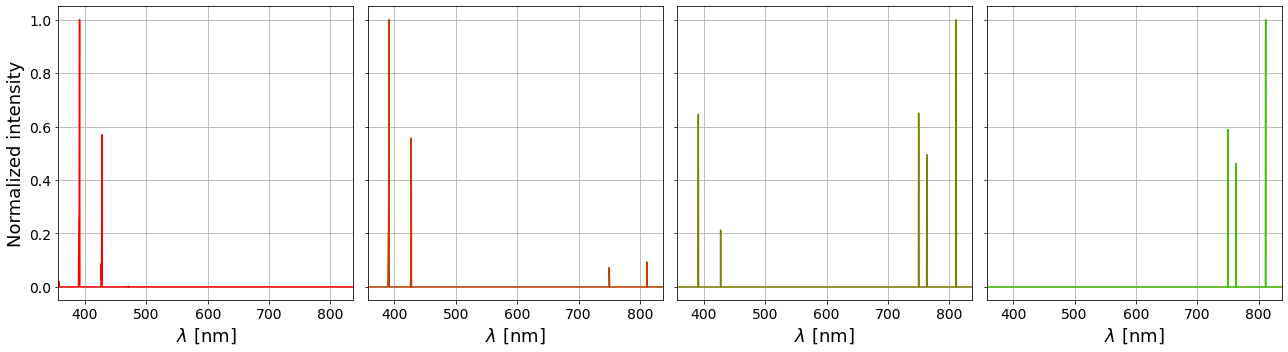

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 4, figsize=(18, 5))


for i, spec in enumerate(ar):
  ax[i].plot(wavelengths, spec, color=(1 - i/4, 0.0 + i/4, 0.0))
  ax[i].grid(True)
  # ax[i].text(510, 4500, f"Ar: {conc_ar[i]}%", fontsize=22)
  ax[i].set_ylim([-0.05, 1.05])
  ax[i].set_xlim([wavelengths.min(), wavelengths.max()])
  ax[i].set_xlabel("$\lambda$ [nm]", fontsize=18)
  ax[i].tick_params(labelsize=14)
  if i != 0:
    ax[i].set_yticklabels([], fontsize=15)
  else:
    ax[i].set_ylabel("Normalized intensity", fontsize=18)

fig.tight_layout()
plt.savefig('Ni_Ar.png')

### Helium

In [ ]:
data_he_ni = full_data[full_data['ni'] + full_data['he'] == 1]
data_he_ni = data_he_ni[data_he_ni["he"] == 0.20]
data_he_ni = data_he_ni[(900 < data_he_ni["Uin"] ) & (data_he_ni["Uin"] < 1000)]
data_he_ni = data_he_ni[(0.005 < data_he_ni["pressure"]) & (data_he_ni["pressure"] < 0.018)]
data_he_ni.head()

,Uin,pressure,co2,ni,ox,ar,he,ne,356.519,356.766,...,835.533,835.737,835.94,836.143,836.346,836.549,836.752,836.955,837.158,837.361
31,959.0,0.015,0.0,0.8,0.0,0.0,0.2,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75,959.0,0.015,0.0,0.8,0.0,0.0,0.2,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
108,959.0,0.015,0.0,0.8,0.0,0.0,0.2,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
150,959.0,0.015,0.0,0.8,0.0,0.0,0.2,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
156,959.0,0.015,0.0,0.8,0.0,0.0,0.2,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
he_0000 = full_data.loc[188].to_numpy()[8:]
he_0200 = full_data.loc[150].to_numpy()[8:]
he_0500 = full_data.loc[311].to_numpy()[8:]
he_1000 = full_data.loc[10].to_numpy()[8:]

he = [he_0000,he_0200, he_0500, he_1000]
conc_he = [0, 20, 50, 100]

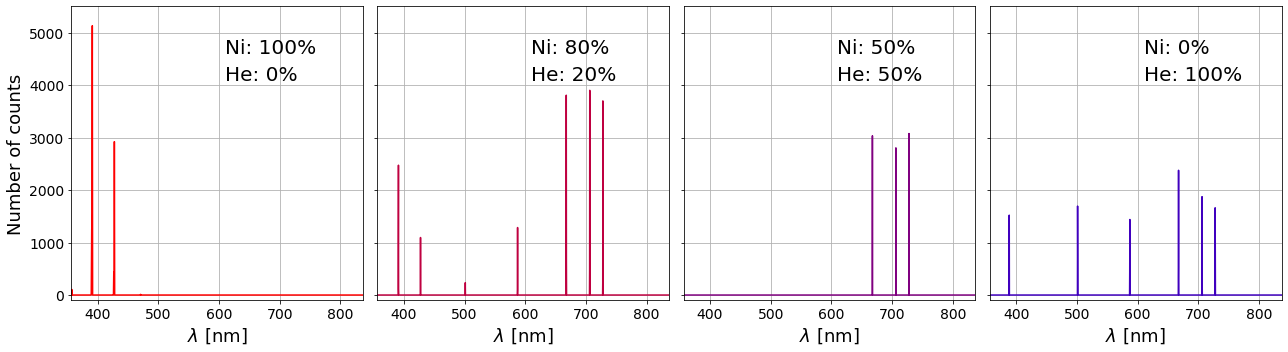

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 4, figsize=(18, 5))

for i, spec in enumerate(he):
  ax[i].plot(wavelengths, spec, color=(1 - i/4, 0.0, 0.0 + i/4))
  ax[i].grid(True)
  ax[i].text(610, 4100, f"He: {conc_he[i]}%", fontsize=20)
  ax[i].text(610, 4600, f"Ni: {100 - conc_he[i]}%", fontsize=20)
  ax[i].set_ylim([-100, 5500])
  ax[i].set_xlim([wavelengths.min(), wavelengths.max()])
  ax[i].set_xlabel("$\lambda$ [nm]", fontsize=18)
  ax[i].tick_params(labelsize=14)
  if i != 0:
    ax[i].set_yticklabels([], fontsize=15)
  else:
    ax[i].set_ylabel("Number of counts", fontsize=18)

fig.tight_layout()
plt.savefig('Ni_He.png')

## General spectra presentation


In [ ]:
full_data[full_data['ar'] > 0.5]


,Uin,pressure,co2,ni,ox,ar,he,ne,356.519,356.766,...,835.533,835.737,835.94,836.143,836.346,836.549,836.752,836.955,837.158,837.361


In [ ]:
co2_clean = full_data.loc[463].to_numpy()[8:]
ox_clean = full_data.loc[242].to_numpy()[8:]
ar_ne = full_data.loc[455].to_numpy()[8:]

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 4, figsize=(18, 5))

for i, spec in enumerate(he):
  ax[i].plot(wavelengths, spec, color=(1 - i/4, 0.0, 0.0 + i/4))
  ax[i].grid(True)
  ax[i].text(610, 4100, f"He: {conc_he[i]}%", fontsize=20)
  ax[i].text(610, 4600, f"Ni: {100 - conc_he[i]}%", fontsize=20)
  ax[i].set_ylim([-100, 5500])
  ax[i].set_xlim([wavelengths.min(), wavelengths.max()])
  ax[i].set_xlabel("$\lambda$ [nm]", fontsize=18)
  ax[i].tick_params(labelsize=14)
  if i != 0:
    ax[i].set_yticklabels([], fontsize=15)
  else:
    ax[i].set_ylabel("Number of counts", fontsize=18)

fig.tight_layout()

## Pressure

In [ ]:
helium = full_data[full_data["he"] == 1]
helium = helium[ (950 < helium["Uin"]) & ( helium["Uin"] < 980)]
helium.sort_values("pressure")

,Uin,pressure,co2,ni,ox,ar,he,ne,356.519,356.766,...,835.533,835.737,835.94,836.143,836.346,836.549,836.752,836.955,837.158,837.361
215,967.0,0.005,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,977.0,0.013,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
233,977.0,0.013,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36,968.0,0.019,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
306,968.0,0.019,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
364,968.0,0.019,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,960.0,0.025,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
74,960.0,0.025,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
187,960.0,0.025,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
p_005 = full_data.loc[215].to_numpy()[8:]
p_013 = full_data.loc[233].to_numpy()[8:]
p_019 = full_data.loc[364].to_numpy()[8:]
p_025 = full_data.loc[187].to_numpy()[8:]

pressure_spektra = [p_005, p_013, p_019, p_025]
pressure_values = [5, 13, 19, 25]

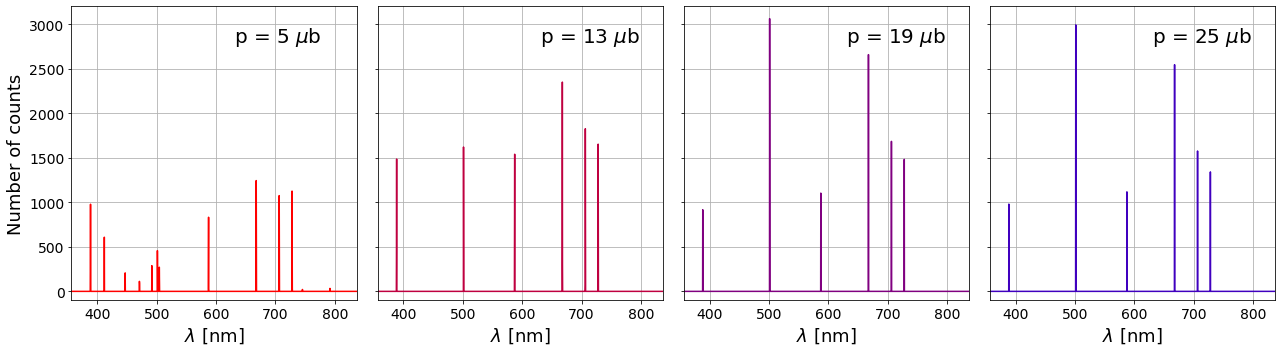

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 4, figsize=(18, 5))

for i, spec in enumerate(pressure_spektra):
  ax[i].plot(wavelengths, spec, color=(1 - i/4, 0.0, 0.0 + i/4))
  ax[i].grid(True)
  ax[i].text(630, 2800, f"p = {pressure_values[i]} $\mu$b", fontsize=20)
  ax[i].set_ylim([-100, 3200])
  ax[i].set_xlim([wavelengths.min(), wavelengths.max()])
  ax[i].set_xlabel("$\lambda$ [nm]", fontsize=18)
  ax[i].tick_params(labelsize=14)
  if i != 0:
    ax[i].set_yticklabels([], fontsize=15)
  else:
    ax[i].set_ylabel("Number of counts", fontsize=18)

fig.tight_layout()
plt.savefig('pressure.png')

## Voltage

In [ ]:
neon = full_data[full_data["ne"] == 0.5]
neon = neon[ neon["pressure"]==0.005]
neon.sort_values("Uin")

,Uin,pressure,co2,ni,ox,ar,he,ne,356.519,356.766,...,835.533,835.737,835.94,836.143,836.346,836.549,836.752,836.955,837.158,837.361
396,597.0,0.005,0.0,0.0,0.0,0.5,0.0,0.5,0.00000,0.000000,...,0.0,14.36367,0.0,0.0,20.36367,0.0,0.0,0.0,21.363670,0.0
157,627.0,0.005,0.0,0.0,0.0,0.5,0.0,0.5,44.60562,12.605620,...,0.0,0.00000,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0
261,657.0,0.005,0.0,0.0,0.0,0.5,0.0,0.5,0.00000,28.245655,...,0.0,0.00000,0.0,0.0,0.00000,0.0,0.0,0.0,5.245655,0.0
357,686.0,0.005,0.0,0.0,0.0,0.5,0.0,0.5,0.00000,0.000000,...,0.0,0.00000,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0
436,716.0,0.005,0.0,0.0,0.0,0.5,0.0,0.5,0.00000,0.000000,...,0.0,0.00000,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0
444,745.0,0.005,0.0,0.0,0.0,0.5,0.0,0.5,0.00000,0.000000,...,0.0,0.00000,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0
185,775.0,0.005,0.0,0.0,0.0,0.5,0.0,0.5,0.00000,0.000000,...,0.0,0.00000,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0
352,805.0,0.005,0.0,0.0,0.0,0.5,0.0,0.5,0.00000,0.000000,...,0.0,0.00000,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0
399,835.0,0.005,0.0,0.0,0.0,0.5,0.0,0.5,0.00000,0.000000,...,0.0,0.00000,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0
158,865.0,0.005,0.0,0.0,0.0,0.5,0.0,0.5,0.00000,0.000000,...,0.0,0.00000,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0


In [ ]:
U_0716 = full_data.loc[436].to_numpy()[8:]
U_0894 = full_data.loc[354].to_numpy()[8:]
U_1013 = full_data.loc[112].to_numpy()[8:]
U_1310 = full_data.loc[90].to_numpy()[8:]

U_spektra = [U_0716, U_013, U_019, U_025]
U_values = [700, 900, 1000, 1300]

NameError: ignored

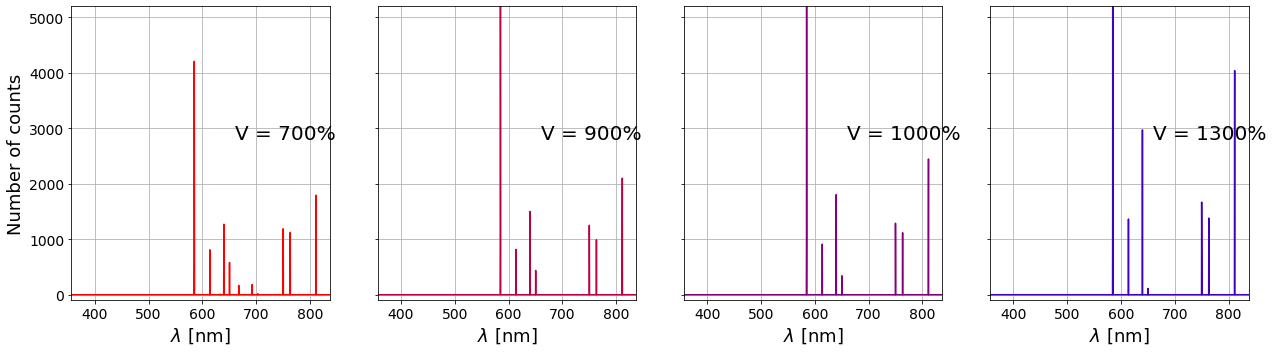

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 4, figsize=(18, 5))

for i, spec in enumerate(U_spektra):
  ax[i].plot(wavelengths, spec, color=(1 - i/4, 0.0, 0.0 + i/4))
  ax[i].grid(True)
  ax[i].text(660, 2800, f"V = {U_values[i]}%", fontsize=20)
  ax[i].set_ylim([-100, 3200])
  ax[i].set_xlim([wavelengths.min(), wavelengths.max()])
  ax[i].set_xlabel("$\lambda$ [nm]", fontsize=18)
  ax[i].tick_params(labelsize=14)
  if i != 0:
    ax[i].set_yticklabels([], fontsize=15)
  else:
    ax[i].set_ylabel("Number of counts", fontsize=18)

fig.tight_layout()
# plt.savefig('pressure.png')